读取mask文件 并进行0.4（loss）  0.6（dc）比例的划分

0.399261474609375
loss: 0.40228271484375
dc: 0.59771728515625
under: 0.25


/tmp/ipykernel_36798/1096552952.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


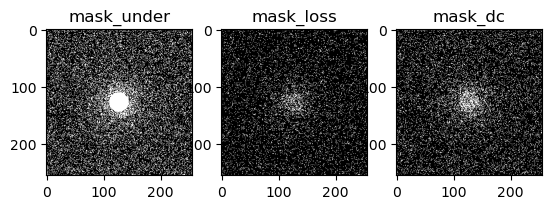

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
fname='/home/liuchun/Desktop/experment02/mask/undersampling_mask/mask_4.00x_acs24.mat'
mask_under_4x= sio.loadmat(fname)
mask_under=mask_under_4x['mask']

# plt.imshow(mask)
# print(mask.shape)
mask1=np.ones_like(mask_under)
mask1=mask1*(np.random.random(mask_under.shape)<0.4)
plt.imshow(mask1,cmap='gray')
print(np.sum(mask1)/(256*256))
mask_loss=mask_under*mask1
mask_dc=mask_under-mask_loss
print('loss:',np.sum(mask_loss)/np.sum(mask_under))
print('dc:',np.sum(mask_dc)/np.sum(mask_under))
print('under:',np.sum(mask_under)/(256*256))

plt.subplot(131)
plt.imshow(mask_under,cmap='gray')
plt.title('mask_under')

plt.subplot(132)
plt.imshow(mask_loss,cmap='gray')
plt.title('mask_loss')

plt.subplot(133)
plt.imshow(mask_dc,cmap='gray')
plt.title('mask_dc')
# mask_loss=
#保存结果
mat_path_loss='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_loss.mat'
mat_path_dc='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_dc.mat'
sio.savemat(mat_path_loss, {'mask': mask_loss})
sio.savemat(mat_path_dc, {'mask': mask_dc})

0.3961639404296875
loss: 0.398578431372549
dc: 0.601421568627451
under: 0.311279296875


/tmp/ipykernel_36798/3630488675.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


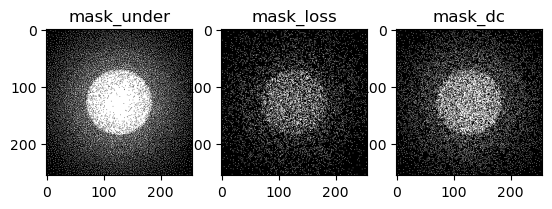

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
fname='/home/liuchun/Desktop/experment02/mask/undersampling_mask/vd_mask_under.mat'
mask_under_4x= sio.loadmat(fname)
mask_under=mask_under_4x['mask']

# plt.imshow(mask)
# print(mask.shape)
mask1=np.ones_like(mask_under)
mask1=mask1*(np.random.random(mask_under.shape)<0.4)
plt.imshow(mask1,cmap='gray')
print(np.sum(mask1)/(256*256))
mask_loss=mask_under*mask1
mask_dc=mask_under-mask_loss
print('loss:',np.sum(mask_loss)/np.sum(mask_under))
print('dc:',np.sum(mask_dc)/np.sum(mask_under))
print('under:',np.sum(mask_under)/(256*256))

plt.subplot(131)
plt.imshow(mask_under,cmap='gray')
plt.title('mask_under')

plt.subplot(132)
plt.imshow(mask_loss,cmap='gray')
plt.title('mask_loss')

plt.subplot(133)
plt.imshow(mask_dc,cmap='gray')
plt.title('mask_dc')
# mask_loss=
# 保存结果
mat_path_loss='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_loss_vd.mat'
mat_path_dc='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_dc_vd.mat'
sio.savemat(mat_path_loss, {'mask': mask_loss})
sio.savemat(mat_path_dc, {'mask': mask_dc})

检查存储数据是否符合预期

loss: 0.39916666666666667
dc: 0.6008333333333333
under: 0.311279296875


Text(0.5, 1.0, 'mask_dc')

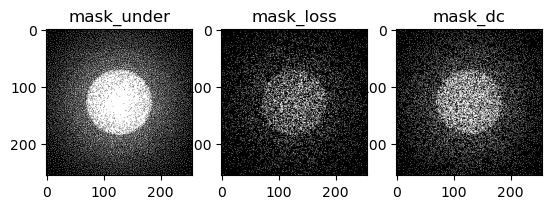

In [16]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
# fname_under='/home/liuchun/Desktop/experment02/mask/undersampling_mask/mask_4.00x_acs24.mat'
fname_under='/home/liuchun/Desktop/experment02/mask/undersampling_mask/vd_mask_under.mat'

fname_loss='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_loss_vd.mat'
fname_dc='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_dc_vd.mat'
# fname_dc='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_dc.mat'
# fname_loss='/home/liuchun/Desktop/experment02/mask/selecting_mask/mask_loss.mat'
mask_under_4x= sio.loadmat(fname_under)
mask_loss= sio.loadmat(fname_loss)
mask_dc= sio.loadmat(fname_dc)

mask_under=mask_under_4x['mask']
mask_loss=mask_loss['mask_loss_vd']
mask_dc=mask_dc['mask_dc_vd']

print('loss:',np.sum(mask_loss)/np.sum(mask_under))
print('dc:',np.sum(mask_dc)/np.sum(mask_under))
print('under:',np.sum(mask_under)/(256*256))

plt.subplot(131)
plt.imshow(mask_under,cmap='gray')
plt.title('mask_under')

plt.subplot(132)
plt.imshow(mask_loss,cmap='gray')
plt.title('mask_loss')

plt.subplot(133)
plt.imshow(mask_dc,cmap='gray')
plt.title('mask_dc')


In [1]:
# # This is a sample Python script.
#
# # Press Shift+F10 to execute it or replace it with your code.
# # Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
#
#
# def print_hi(name):
#     # Use a breakpoint in the code line below to debug your script.
#     print(f'Hi, {name}')  # Press Ctrl+F8 to toggle the breakpoint.
#
#
# # Press the green button in the gutter to run the script.
# if __name__ == '__main__':
#     print_hi('PyCharm')
#
# # See PyCharm help at https://www.jetbrains.com/help/pycharm/

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
# 生成高斯变密度采样mask
def generate_gaussian_mask(shape, factor=4, sigma=1):
    # 构造高斯函数
    x = np.arange(shape[0]) - shape[0]//2
    y = np.arange(shape[1]) - shape[1]//2
    xv, yv = np.meshgrid(x, y)
    rv = np.sqrt(xv**2 + yv**2)
    gauss = np.exp(-0.5 * (rv/sigma)**2)

    # 计算密度函数
    density = np.sum(gauss, axis=1)

    # 计算采样概率分布
    prob = scipy.signal.resample(density, shape[0]//factor)
    prob = np.tile(prob, (shape[1]//factor, 1)).T
    prob /= np.max(prob)

    # 生成采样mask
    mask = np.random.rand(*shape) < prob

    return mask.astype(np.float32)

# 测试生成高斯变密度采样mask
mask = generate_gaussian_mask((256, 256), factor=4, sigma=8)

plt.imshow(mask,cmap='gray')


ValueError: operands could not be broadcast together with shapes (256,256) (64,64) 